In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# another way to deal with the change of measure for GBM, 
# it is a kind of switch it to a ABM with different drift, with the transformation of log()

In [23]:
S0=100;mu = 0.25 ; sig = 0.35; days=50;

In [99]:
#GBM drift and sigma all should be like % range
def generate_GBM_path(days,start,drift,sigma):
    S_path=[start]
    for i in range(days):
        S_next = S_path[-1] * np.exp( (drift-0.5*sigma**2)*deltaT + sigma*deltaT**0.5*np.random.normal(0,1,1)[0])
        S_path.append(S_next)
    
    return S_path   

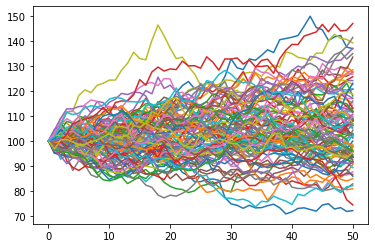

In [100]:
D = np.linspace(0,50,51)
deltaT = 1/252
np.random.seed(40)
for i in range(100):
    plt.plot(generate_GBM_path(50,S0,0.25,0.35))
plt.show()

In [101]:
def generate_GBM_path2 (days,start,drift,sigma):
    S_path = [np.log(start)]
    
    for i in range(days):
        S_next = S_path[-1] + ((drift-0.5*(sigma)**2)*deltaT) + (sigma*deltaT**0.5) *np.random.normal(0,1,1)[0]
        S_path.append(S_next)
    
    return [np.exp(i) for i in S_path]
    

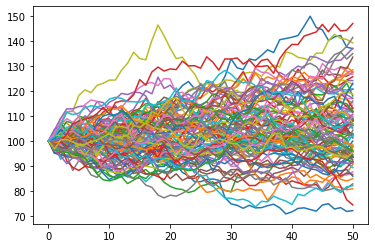

In [102]:
D = np.linspace(0,50,51)
deltaT = 1/252
np.random.seed(40)
for i in range(100):
    plt.plot(generate_GBM_path2(50,S0,0.25,0.35))
plt.show()

In [103]:
Paths=[];
np.random.seed(40)
for i in range(1000):
    Paths.append(generate_GBM_path(50,S0,0.25,0.35))
D = np.linspace(0,50,51)
D2= pd.DataFrame(Paths)
D2[50].describe()

count    1000.000000
mean      105.290406
std        16.596175
min        68.033176
25%        93.040049
50%       103.600569
75%       116.572468
max       166.219118
Name: 50, dtype: float64

In [104]:
Paths=[];
np.random.seed(40)
for i in range(10000):
    Paths.append(generate_GBM_path2(50,S0,0.25,0.35))
D = np.linspace(0,50,51)
D2= pd.DataFrame(Paths)
D2[50].describe()

count    10000.000000
mean       105.387234
std         16.561027
min         54.758744
25%         93.784128
50%        103.924972
75%        115.488679
max        187.004419
Name: 50, dtype: float64

In [105]:
def generate_ABM_changeofmeasurment(days, start, drift, sigma):
    S_path=[start]
    for i in range(days):
        Bt = np.random.normal(0,1,1)[0]
        
        radon_n_d = np.exp((-drift*deltaT)/(sigma*deltaT**0.5)*Bt-0.5*((-drift*deltaT)/(sigma*deltaT**0.5))**2*deltaT)
        S_next = (S_path[-1] + (drift*deltaT + sigma*deltaT**0.5*Bt) * radon_n_d)
        S_path.append(S_next)
    
    return S_path     

In [106]:
deltaT=1/2520
def generate_GBM_changeofmeasure2 (days,start,drift,sigma):
    S_path = [np.log(start)]
    
    for i in range(days):
        
        Bt = np.random.normal(0,1,1)[0]
        
        m1 = (drift * deltaT-0.5*(sigma*deltaT**0.5)**2)/(sigma*deltaT**0.5
                                                         )
        radon_n_d = np.exp(-m1*Bt-0.5*(m1)**2*deltaT)
        
        
        S_next = S_path[-1] + (((drift-0.5*(sigma)**2)*deltaT) + (sigma*deltaT**0.5)* Bt) * radon_n_d
        S_path.append(S_next)
    
    return [np.exp(i) for i in S_path]
    
    

In [110]:
Paths=[];
np.random.seed(40)
for i in range(1000):
    Paths.append(generate_GBM_changeofmeasure2(500,S0,0.25,0.35))
D2= pd.DataFrame(Paths)
D2[50].describe()

count    1000.000000
mean      100.292242
std         5.105080
min        84.567679
25%        96.849838
50%       100.031878
75%       103.558686
max       119.055606
Name: 50, dtype: float64

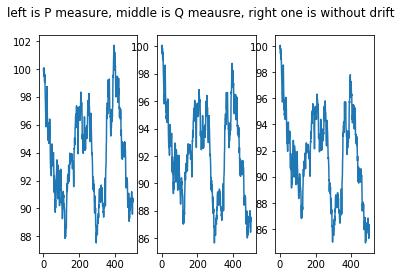

In [112]:
T=500;S0=100;mu=0.25;sig=0.35;
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('left is P measure, middle is Q meausre, right one is without drift')
np.random.seed(41)
ax1.plot(generate_GBM_path(T,S0,mu,sig))
np.random.seed(41)
ax2.plot(generate_GBM_changeofmeasure2(T,S0,mu,sig))
np.random.seed(41)
ax3.plot(generate_GBM_path(T,S0,0,sig))

## Change of measure can be used to derive the BS Model

### we have St = S0 * exp( (r-0.5*sig^2) * T + sig*Bt)

### C0 = exp(-rT) * E under Q (( St - K ) * 1(St>K))

### it is can be divide into 2 parts as C0 = S0 * N (d1) - exp(-rt) * K * N(d2)

### the derivation of N(d1) needs the help of Change of measure
### it can be used to substidute the  exp(-0.5*sig^2 + sig* Bt ) term 

### we can have BT ^  = BT - sig*T  and use this we can get 

### St = S0 * exp( (r-0.5*sig^2) * T + sig*(Bt^ + sig*T)) under new measure of Q^